In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [7]:
data = pd.read_csv('data/HNP_health_and_stuff.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,134.772341,135.343859,136.030214,135.898025,135.721826,135.387563,...,49.790826,49.344963,48.853665,48.279737,47.505489,46.688851,46.005049,45.245367,NaN,NaN
1,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15-49) newly infected with HIV,SH.HIV.INCD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

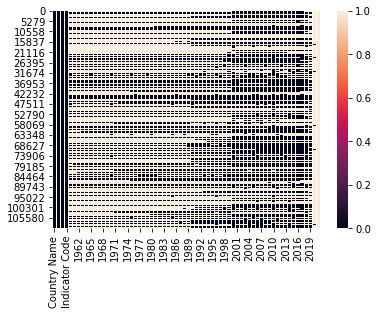

In [8]:
sns.heatmap(data.isna())

In [3]:
metrics = ['SP.ADO.TFRT', 'SP.DYN.SMAM.FE', 'SP.DYN.SMAM.MA', 'SP.DYN.CBRT.IN', 'SH.XPD.KHEX.GD.ZS', 'SP.DYN.CONU.ZS',
          'SH.XPD.CHEX.GD.ZS', 'SH.XPD.CHEX.PC.CD', 'SP.DYN.CDRT.IN', 'SP.DYN.LE00.IN', 'SE.ADT.LITR.ZS', 'SE.ADT.1524.LT.ZS',
          'SH.MMR.WAGE.ZS', 'SH.STA.AIRP.P5', 'SM.POP.NETM', 'SH.MED.PHYS.ZS', 'SP.POP.GROW', 'SI.POV.NAHC', 'SH.PRV.SMOK',
          'SH.STA.OWAD.ZS', 'SE.XPD.TOTL.GD.ZS', 'SE.PRM.ENRR', 'SE.SEC.ENRR', 'SH.STA.SUIC.P5', 'SH.ALC.PCAP.LI',
          'SL.UEM.TOTL.ZS', 'SP.URB.TOTL']

data = data[data['Indicator Code'].isin(metrics)]
data = pd.melt(data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
       value_vars=['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

data.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Year', 'Value']
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

In [4]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2000,54.346048
1,Arab World,ARB,"Age at first marriage, female",SP.DYN.SMAM.FE,2000,NaN
2,Arab World,ARB,"Age at first marriage, male",SP.DYN.SMAM.MA,2000,NaN
3,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2000,28.709115
4,Arab World,ARB,Capital health expenditure (% of GDP),SH.XPD.KHEX.GD.ZS,2000,NaN


In [5]:
data = data.pivot_table('Value', ['Country Name', 'Country Code', 'Indicator Code', 'Year'], 'Indicator Name').reset_index(drop=False)
data.head()


Indicator Name,Country Name,Country Code,Indicator Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Age at first marriage, female","Age at first marriage, male","Birth rate, crude (per 1,000 people)",Capital health expenditure (% of GDP),"Contraceptive prevalence, any methods (% of women ages 15-49)",...,Poverty headcount ratio at national poverty line (% of population),Prevalence of current tobacco use (% of adults),Prevalence of overweight (% of adults),"Public spending on education, total (% of GDP)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","Suicide mortality rate (per 100,000 population)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force)",Urban population
0,Afghanistan,AFG,SE.ADT.1524.LT.ZS,2011,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,SE.ADT.1524.LT.ZS,2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,SE.ADT.LITR.ZS,2011,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,SE.ADT.LITR.ZS,2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,SE.PRM.ENRR,2000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.957581,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Indicator Name'>

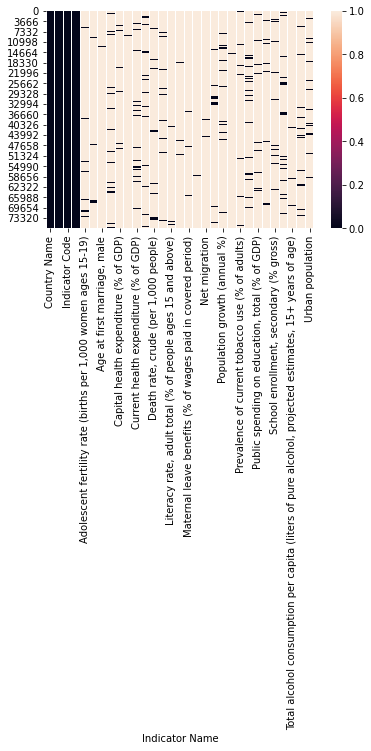

In [6]:
sns.heatmap(data.isna())

# WHR

In [28]:
whr_data = pd.read_csv('data/whr_data.csv')
whr_data.drop('Unnamed: 0', axis=1, inplace=True)
whr_data = whr_data[whr_data['Country Code'] != 'Unknown']

data = pd.merge(whr_data, data, on=['Country Code', 'Year'])
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption,Year,Country Code,...,Poverty headcount ratio at national poverty line (% of population),Prevalence of current tobacco use (% of adults),Prevalence of overweight (% of adults),"Public spending on education, total (% of GDP)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","Suicide mortality rate (per 100,000 population)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force)",Urban population
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2014,CHE,...,NaN,NaN,NaN,NaN,103.487427,NaN,NaN,NaN,NaN,NaN
1,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2014,CHE,...,NaN,NaN,NaN,5.05123,NaN,NaN,NaN,NaN,NaN,NaN
2,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2014,CHE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2014,CHE,...,NaN,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2014,CHE,...,NaN,NaN,53.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

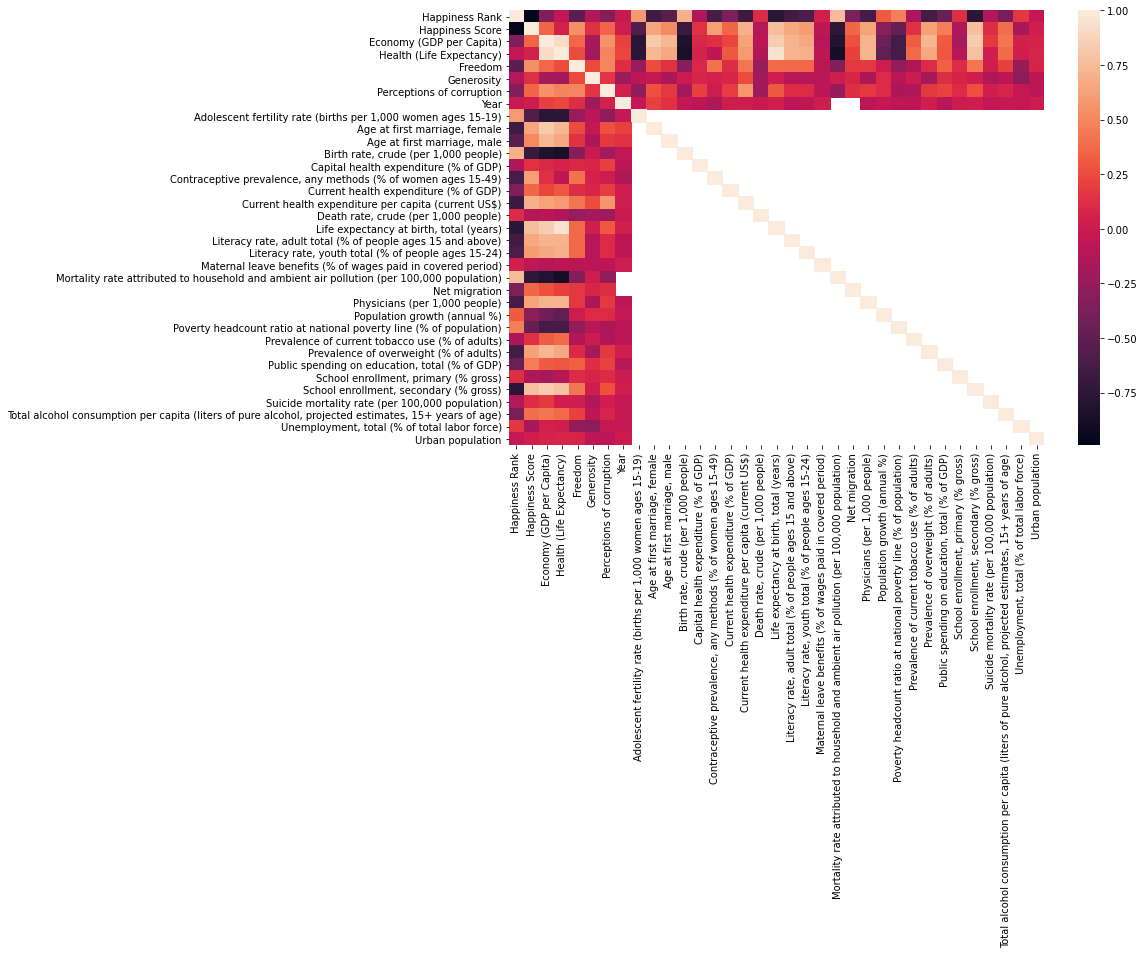

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr())

# Prosperity Index

In [30]:
def clean_year(row):
    return row.split('_')[1]

In [31]:
prosp_data = pd.read_excel('data/Legatum_Prosperity_Index_Full_2020_Data_Set.xlsx', engine='openpyxl')

prosp_data = pd.melt(prosp_data, id_vars=['area_name', 'area_code', 'area_group'], value_vars=[ 'score_2007', 'score_2008', 'score_2009',
       'score_2010', 'score_2011', 'score_2012', 'score_2013', 'score_2014',
       'score_2015', 'score_2016', 'score_2017', 'score_2018', 'score_2019',
       'score_2020'])

prosp_data['variable'] = prosp_data['variable'].apply(clean_year)
prosp_data.columns = ['Country', 'Country Code', 'Area Group', 'Year', 'Score']
prosp_data['Year'] = pd.to_numeric(prosp_data['Year'], errors='coerce')

In [36]:
data = pd.merge(prosp_data, data, on=['Country Code', 'Year'])
data.head()

,Country,Country Code,Area Group,Year,Score,Country Name,Indicator Code,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Age at first marriage, female","Age at first marriage, male",...,Poverty headcount ratio at national poverty line (% of population),Prevalence of current tobacco use (% of adults),Prevalence of overweight (% of adults),"Public spending on education, total (% of GDP)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","Suicide mortality rate (per 100,000 population)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force)",Urban population
0,Afghanistan,AFG,Asia-Pacific,2007,33.691287,Afghanistan,SE.PRM.ENRR,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,98.93351,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Asia-Pacific,2007,33.691287,Afghanistan,SE.SEC.ENRR,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,28.49334,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Asia-Pacific,2007,33.691287,Afghanistan,SH.MED.PHYS.ZS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Asia-Pacific,2007,33.691287,Afghanistan,SH.STA.OWAD.ZS,NaN,NaN,NaN,...,NaN,NaN,17.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Asia-Pacific,2007,33.691287,Afghanistan,SH.STA.SUIC.P5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.8,NaN,NaN,NaN


<AxesSubplot:>

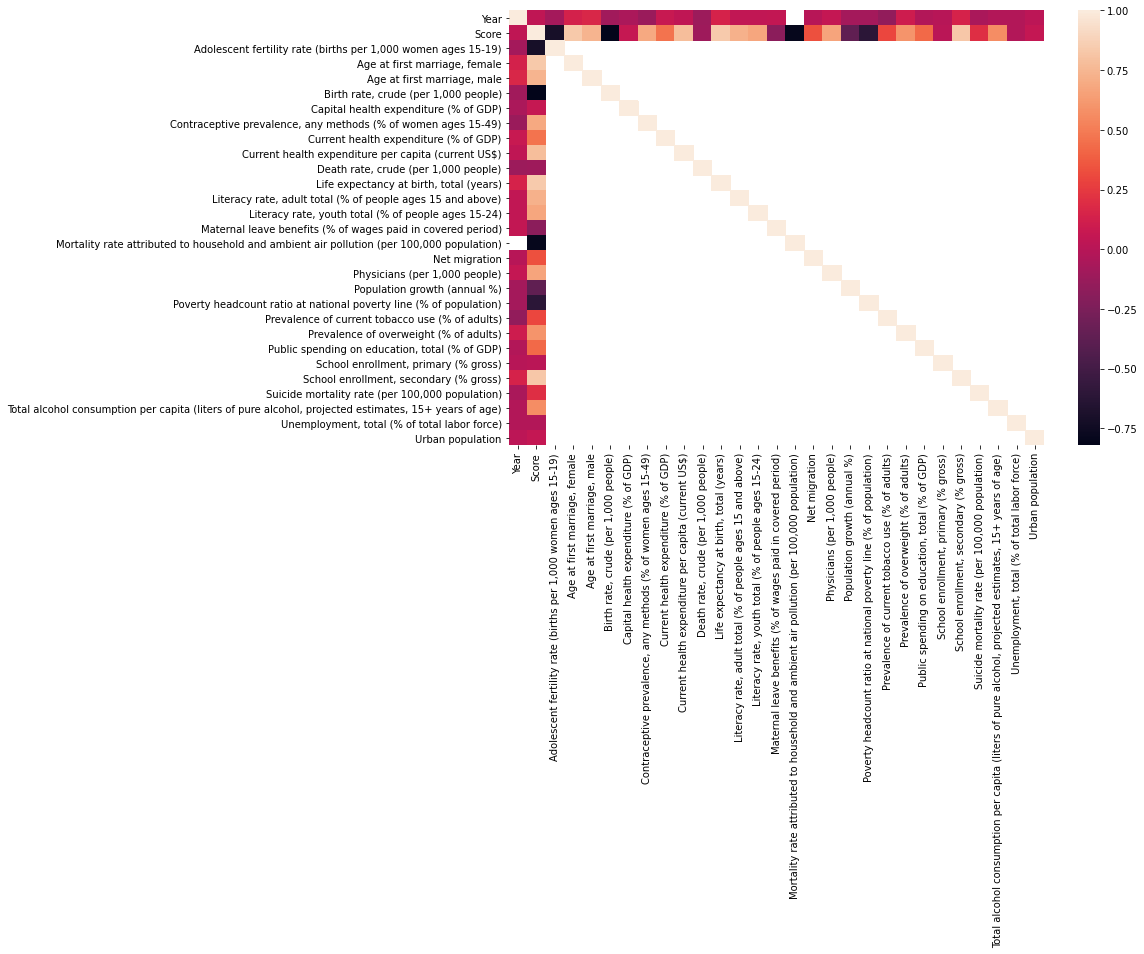

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr())